# Задача на А/В тестирование для анализа датасета Российских Железных дорог

**Контекст задачи:**

Российские Железные Дороги (РЖД) хотят провести эксперимент для увеличения доходов от пассажирских перевозок. Компания планирует протестировать новую рекламную стратегию для повышения продаж билетов на поезда СВ и люкс-класса. Новая стратегия включает более агрессивное использование онлайн-каналов и предоставление скидок на будущие поездки пассажирам, которые выберут эти классы обслуживания.

Для проверки эффективности новой стратегии, было решено провести А/В тестирование.

## Описание задачи

Цель теста:

Понять, насколько новая рекламная стратегия (В-группа) эффективнее существующей стратегии (А-группа) в привлечении пассажиров на поезда СВ и люкс-класса и увеличении доходов от этих категорий пассажиров.

Метрика успеха:
- Основной метрикой успеха будет увеличение среднего дохода на одного пассажира СВ и люкс-класса. Дополнительные метрики включают:
- Частота покупки билетов в СВ и люкс-класс (отношение числа покупок к числу пассажиров).
- Средний чек за поездку.
- Доля повторных покупок (лояльность).

Группы теста:
- Группа A: Пассажиры, которые продолжают получать рекламу по старой стратегии.
- Группа B: Пассажиры, которым показана новая реклама и предложена скидка на будущие поездки.

## Продолжительность теста:

Тест будет проходить в течение 2 месяцев, что позволит учесть сезонные колебания в спросе.

## Гипотеза:

Новая рекламная стратегия повысит средний доход от пассажиров в СВ и люкс-классе на 10% по сравнению с текущей стратегией.

## Шаги выполнения задачи

### Подготовка данных для А/В теста

Используйте данные по пассажирам РЖД, в которых доступны следующие признаки:
- Тип билета: Плацкарт, купе, СВ, люкс (категориальный, закодированный).
- Стоимость билета: Числовое значение.
- Канал покупки: Онлайн, касса, мобильное приложение и т.д. (категориальный, закодированный).
- Дата поездки: Дата и время поездки (числовой формат или категориальные признаки: месяц, день недели).
- Лояльность: Количество поездок за последние 12 месяцев.
- Частота поездок: Числовой показатель.
- Возраст и пол: Важные для понимания демографического профиля.
- Доход от пассажира: Числовой показатель дохода, приносимого пассажиром за один год.

### Используйте следующие методы для анализа данных:
- EDA (exploratory data analysis): Проведите анализ данных по пассажирам каждой группы (A и B), изучив их демографические характеристики, поведение (например, частоту поездок), предпочтения по типу билетов, каналу покупок и средний доход.
- Корреляционный анализ: Найдите корреляции между типом билета (СВ/люкс), стоимостью билета, каналом покупки и доходом от пассажира. Это поможет понять, какие факторы влияют на поведение пассажиров в группах.
- Регрессионный анализ: Постройте регрессионную модель (например, случайный лес или линейная регрессия), чтобы предсказать средний доход пассажира, основываясь на типе билета, частоте поездок и канале покупки. Это поможет понять, насколько значимым фактором является новая рекламная кампания.

### Анализ результатов А/В теста:
- Сравните средний доход от пассажиров СВ и люкс-класса в группах A и B.
- Оцените различие в частоте покупок билетов, объеме продаж и лояльности между группами.
- Оцените, насколько новая стратегия привлекает новых клиентов в СВ/люкс-классы и удерживает существующих.

## Выводы и рекомендации

На основе анализа данных сделайте следующие выводы:
- Увеличился ли средний доход на одного пассажира в СВ и люкс-классе в группе B?
- Повлияла ли новая стратегия на рост лояльности пассажиров? (Например, стали ли пассажиры чаще покупать билеты в этих классах?)
- Следует ли РЖД внедрять новую рекламную стратегию на постоянной основе?
- Данные и метрики для оценки:
- Средний доход на пассажира в группе A и B.
- Процент пассажиров, повторно покупающих билеты в СВ/люкс-классе.
- Средний чек на поездку.
- Канал покупки билетов и его влияние на доходность.

# Датасеты

`Dataset_AB1.csv`

`Dataset_AB2.csv`

```python
import pandas as pd
import scipy.stats as stats

dataset=pd.read_csv('Dataset_AB2.csv')
```


# Код

```python
# Разделим данные на группы A и B
group_a = dataset[dataset['Group'] == 'A']
group_b = dataset[dataset['Group'] == 'B']
    
# Основные показатели для сравнения - средний доход (Income)
income_a = group_a['Income']
income_b = group_b['Income']
    
# Проверим нормальность распределения с помощью теста Шапиро-Уилка (для каждого набора)
# H0: Данные распределены нормально
shapiro_a = stats.shapiro(income_a)
shapiro_b = stats.shapiro(income_b)

# Проверим равенство дисперсий с помощью теста Левене
# H0: Дисперсии одинаковы
levene_test = stats.levene(income_a, income_b)

# Если распределение нормальное и дисперсии одинаковы, используем t-тест для независимых выборок
# H0: Средние доходы в группах A и B равны
ttest_result = stats.ttest_ind(income_a, income_b, equal_var=True)
    
# Вывод результатов
results = {
        "Shapiro-Wilk A (p-value)": shapiro_a.pvalue,
        "Shapiro-Wilk B (p-value)": shapiro_b.pvalue,
        "Levene's Test (p-value)": levene_test.pvalue,
        "T-test (p-value)": ttest_result.pvalue,
        "Mean Income A": income_a.mean(),
        "Mean Income B": income_b.mean(),
    }

results

```

In [11]:
import pandas as pd
import scipy.stats as stats

dataset=pd.read_csv('Dataset_AB1.csv')

In [12]:
dataset.sample(2)

,Group,Age,Gender,Frequency_of_Trips,Income
946,A,23,0,3,3592.356750
8769,B,37,1,4,2728.345172


In [13]:
dataset['Group'].value_counts()

A    5000
B    5000
Name: Group, dtype: int64

In [14]:
dataset[dataset['Group']=='A'].describe()

,Age,Gender,Frequency_of_Trips,Income
count,5000.00000,5000.00000,5000.00000,5000.000000
mean,43.58380,0.50000,5.05040,2999.826265
std,14.89395,0.50005,2.21541,492.446263
min,18.00000,0.00000,0.00000,1136.929362
25%,31.00000,0.00000,3.00000,2661.436232
50%,44.00000,0.50000,5.00000,3005.489580
75%,56.00000,1.00000,6.00000,3334.888203
max,69.00000,1.00000,14.00000,4768.024037


In [15]:
dataset[dataset['Group']=='B'].describe()

,Age,Gender,Frequency_of_Trips,Income
count,5000.00000,5000.00000,5000.00000,5000.000000
mean,43.58380,0.50000,5.05040,2923.388177
std,14.89395,0.50005,2.21541,499.232240
min,18.00000,0.00000,0.00000,1096.188425
25%,31.00000,0.00000,3.00000,2579.336254
50%,44.00000,0.50000,5.00000,2927.938847
75%,56.00000,1.00000,6.00000,3255.925359
max,69.00000,1.00000,14.00000,4852.141240


In [16]:
# Разделим данные на группы A и B
group_a = dataset[dataset['Group'] == 'A']
group_b = dataset[dataset['Group'] == 'B']
    
# Основные показатели для сравнения - средний доход (Income)
income_a = group_a['Income']
income_b = group_b['Income']
    
# Проверим нормальность распределения с помощью теста Шапиро-Уилка (для каждого набора)
# H0: Данные распределены нормально
shapiro_a = stats.shapiro(income_a)
shapiro_b = stats.shapiro(income_b)

# Проверим равенство дисперсий с помощью теста Левене
# H0: Дисперсии одинаковы
levene_test = stats.levene(income_a, income_b)

# Если распределение нормальное и дисперсии одинаковы, используем t-тест для независимых выборок
# H0: Средние доходы в группах A и B равны
ttest_result = stats.ttest_ind(income_a, income_b, equal_var=True)
    
# Вывод результатов
results = {
        "Shapiro-Wilk A (p-value)": shapiro_a.pvalue,
        "Shapiro-Wilk B (p-value)": shapiro_b.pvalue,
        "Levene's Test (p-value)": levene_test.pvalue,
        "T-test (p-value)": ttest_result.pvalue,
        "Mean Income A": income_a.mean(),
        "Mean Income B": income_b.mean(),
    }

results

{'Shapiro-Wilk A (p-value)': 0.9243060946464539,
 'Shapiro-Wilk B (p-value)': 0.3193551003932953,
 "Levene's Test (p-value)": 0.292163684463799,
 'T-test (p-value)': 1.4021156928782393e-14,
 'Mean Income A': 2999.826265408177,
 'Mean Income B': 2923.3881769120253}

<Axes: >

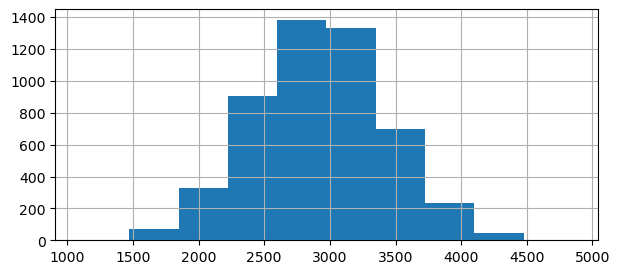

In [17]:
dataset[dataset['Group']=='B']['Income'].hist(figsize=(7,3))

Вот краткая справка по каждой метрике, используемой для проверки гипотезы:

### Shapiro-Wilk Test (Shapiro-Wilk A/B (p-value))
- Назначение: Проверка нормальности распределения данных.
- Гипотеза H0: Данные имеют нормальное распределение.
- Интерпретация: Если p-value > 0.05, то нет оснований отвергнуть нулевую гипотезу, что данные имеют нормальное распределение. Если p-value < 0.05, данные не распределены нормально.
- Использование: Важно проверить нормальность данных перед использованием t-теста, так как t-тест предполагает нормальное распределение.

### Levene’s Test (Levene's Test (p-value))
- Назначение: Проверка равенства дисперсий двух выборок.
- Гипотеза H0: Дисперсии двух групп равны.
- Интерпретация: Если p-value > 0.05, то дисперсии двух групп можно считать равными. Если p-value < 0.05, дисперсии существенно различаются.
- Использование: Необходимо для определения, какой вариант t-теста применять: стандартный t-тест (с равными дисперсиями) или его модификация для случаев с разными дисперсиями.

### T-test (T-test (p-value))
- Назначение: Проверка разницы средних значений между двумя независимыми группами.
- Гипотеза H0: Средние значения в группах A и B равны.
- Интерпретация: Если p-value < 0.05, то гипотеза о равенстве средних отвергается, и можно утверждать, что между группами есть статистически значимая разница. Если p-value > 0.05, разница в средних не является статистически значимой.
- Использование: Позволяет проверить, есть ли значительная разница в средних доходах между группами A и B, что помогает оценить эффективность новой стратегии.

### Mean Income (Mean Income A/B)
- Назначение: Это среднее значение дохода в каждой группе.
- Интерпретация: Сравнение средних доходов между группами A и B даёт представление о том, какая группа имеет больший доход. Это ключевой показатель для оценки эффективности новой рекламной стратегии.
- Использование: Используется для визуальной оценки различий в доходах, которые затем подтверждаются статистическими тестами (t-тест).